### Importar Libraries

In [1]:
import numpy as np
import pandas as pd

### Importar Dataset

In [2]:
df = pd.read_csv("C:/Users/USER/OneDrive - Universidad de los andes/Analitica comp/Proyecto 2/bank-full.csv", sep= ";")

In [3]:
df.shape

(45211, 17)

In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
# Obtener el tipo de datos de cada columna
tipos_de_datos = df.dtypes

# Mostrar los tipos de datos de cada columna
print(tipos_de_datos)

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object


In [6]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [7]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [8]:
# número de duplicados
duplicates = len(df[df.duplicated()])
print(f'Number of Duplicate Entries: {duplicates}')

Number of Duplicate Entries: 0


In [9]:
# número de valores perdidos
missing_values = df.isnull().sum().sum()
print(f'Number of Missing Values: {missing_values}')

Number of Missing Values: 0


Limpieza de datos



In [10]:
#Se eliminan los datos atípicos de la columna actual productivity 
df= df.dropna(subset=["actual_productivity"])
df.shape

KeyError: ['actual_productivity']

In [ ]:
#Los datos faltantes de la columna wip se remplazan por la moda
df['wip'].fillna(df['wip'].mode()[0], inplace=True)
print(df)

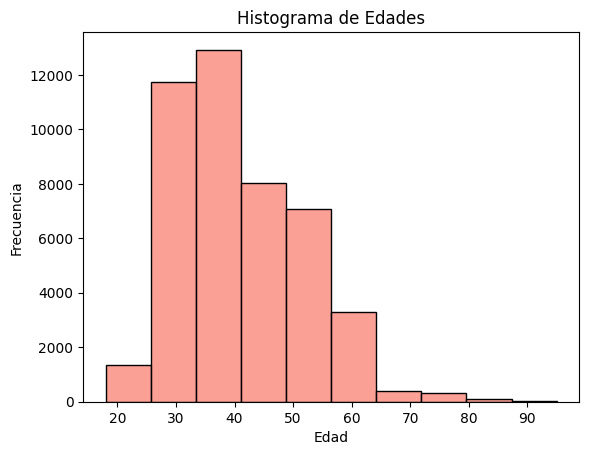

In [19]:

import seaborn as sns
import matplotlib.pyplot as plt

# Histograma usando Seaborn
sns.histplot(df['age'], bins=10, kde=False, color= 'salmon')  # kde=True si quieres la curva de densidad
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Histograma de Edades')
plt.show()

Se confuguran los tipos de datos al formato adecuado

In [17]:
df["date"] = pd.to_datetime(df["date"],format="%m/%d/%Y")

In [ ]:

# Se asegura que los datos de que la columna no_of_workers esté en formato numérico
df['no_of_workers'] = pd.to_numeric(df['no_of_workers'], errors='coerce')

# Aproximar los valores al entero superior
df['no_of_workers'] = np.ceil(df['no_of_workers']).astype(int)

# Mostrar el dataframe actualizado
print(df)

In [ ]:
# Convertir la columna actual_productivity de object a float
df['actual_productivity'] = pd.to_numeric(df['actual_productivity'], errors='coerce')

# Mostrar el dataframe actualizado
print(df)

In [20]:
df = df[(df['actual_productivity'] >= 0) & (df['actual_productivity'] <= 1)]

In [ ]:
# Se revisa que los cambios hayan sido realizados correctamente
tipos_de_datos = df.dtypes

# Mostrar los tipos de datos de cada columna
print(tipos_de_datos)

Conversión de características

In [11]:
df["job"].value_counts()

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64

In [12]:
df["marital"].value_counts()

marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64

In [13]:
df["education"].value_counts()

education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64

In [14]:
df["default"].value_counts()

default
no     44396
yes      815
Name: count, dtype: int64

In [15]:
df["housing"].value_counts()

housing
yes    25130
no     20081
Name: count, dtype: int64

In [16]:
df["loan"].value_counts()

loan
no     37967
yes     7244
Name: count, dtype: int64

In [17]:
df["contact"].value_counts()

contact
cellular     29285
unknown      13020
telephone     2906
Name: count, dtype: int64

In [ ]:
df["month"].value_counts()

In [ ]:
df["poutcome"].value_counts()

In [ ]:
mapyn = {'no': 0,'yes': 1  }
df["loan"] = df["loan"].map(mapyn)
df["housing"] = df["housing"].map(mapyn)
df["default"] = df["default"].map(mapyn)


print(df)

In [ ]:
month_map = {'jan': 1,'feb': 2 , 'mar': 3, 'apr': 4 , 'may': 5 ,'jun': 6, 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10 , 'nov': 11, 'dec': 12}
df["month"] = df["month"].map(month_map)

print(df)

Se crea un nuevo csv con la limpieza de datos

In [32]:
df.to_csv('productividad_limpio.csv', encoding='utf-8' , index=False)